# Data Loading & Operations

## Dataframe

In [1]:
import pandas as pd

dataframe = pd.read_csv('./nba_players_data/players.csv')
print(dataframe.head())
print('---')
print(dataframe.shape)

   playerid     fname    lname        position height  weight    birthday  \
0   1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1    203500    Steven    Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4   1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  
0      Nigeria          Memphis        2020          1.0          20.0  
1  New Zealand       Pittsburgh        2013          1.0          12.0  
2          USA         Kentucky        2017          1.0          14.0  
3          USA           Kansas        2022          1.0          14.0  
4        Spain  Loyola-Maryland        2021          1.0          30.0  
---
(548, 12)


In [2]:
import numpy as np

dataframe['name'] = dataframe['fname'] + ' ' + dataframe['lname']
dataframe.drop(columns=['lname', 'fname', 'birthday', 'country', 'school', 'draft_year', 'draft_round', 'draft_number'], inplace=True)
dataframe.set_index('name', inplace=True)
dataframe.dropna(axis=0, inplace=True)

def convert_height_to_cm(height: str) -> float:
    feet, inch = [float(item) for item in height.split('-')]
    height_cm = feet * 30.48 + inch * 2.54
    return height_cm/100.0

dataframe['height'] = [convert_height_to_cm(height) for height in dataframe['height']]
print(dataframe.head())
print('---')
print(dataframe.shape)

                  playerid        position  height  weight
name                                                      
Precious Achiuwa   1630173         Forward  2.0320     225
Steven Adams        203500          Center  2.1082     265
Bam Adebayo        1628389  Center-Forward  2.0574     255
Ochai Agbaji       1630534           Guard  1.9558     215
Santi Aldama       1630583  Forward-Center  2.1336     215
---
(548, 4)


In [ ]:
# Add
dataframe['luck_point'] = np.random.rand(548)
print(dataframe.head())

In [ ]:
dataframe.sort_values('luck_point', key=lambda x: x, ascending=False)

In [52]:
df2 = dataframe.groupby('name')['weight'].agg(['mean', 'sum'])
print(df2.shape)
print(df2.loc['LeBron James'])

(548, 2)
mean    250.0
sum     250.0
Name: LeBron James, dtype: float64


## Data Visualization

In [3]:
import matplotlib.pyplot as plt

In [4]:

h_w_df = dataframe.groupby('height')['weight'].agg(['mean'])
h_w_df.reset_index(inplace=True)
h_w_df.sort_values('height', ascending=False, inplace=True, key=lambda x: x)
print(h_w_df.head())
print('---')
print(h_w_df.shape)
print('---')
print(type(h_w_df))

    height        mean
19  2.2352  290.000000
18  2.2098  240.000000
17  2.1844  241.250000
16  2.1590  250.833333
15  2.1336  242.962963
---
(20, 2)
---
<class 'pandas.core.frame.DataFrame'>


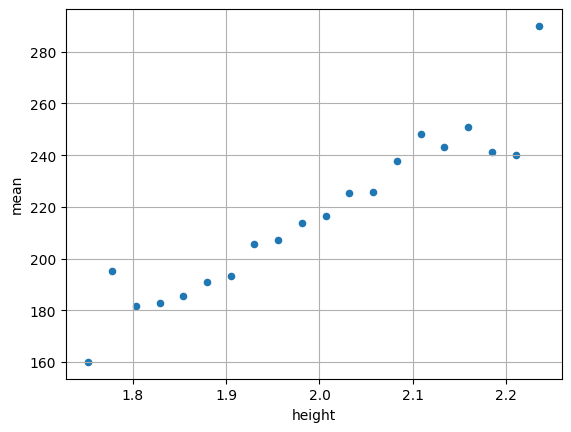

In [5]:
h_w_df.plot(x='height', y='mean', kind='scatter', grid=True)
plt.show()

# Machine Learning

## 1. Isotonic Regression

In [28]:
from sklearn.isotonic import IsotonicRegression

ir = IsotonicRegression()
X = np.array(h_w_df['height'].values)
y = h_w_df['mean'].values
y_ir = ir.fit_transform(X, y)

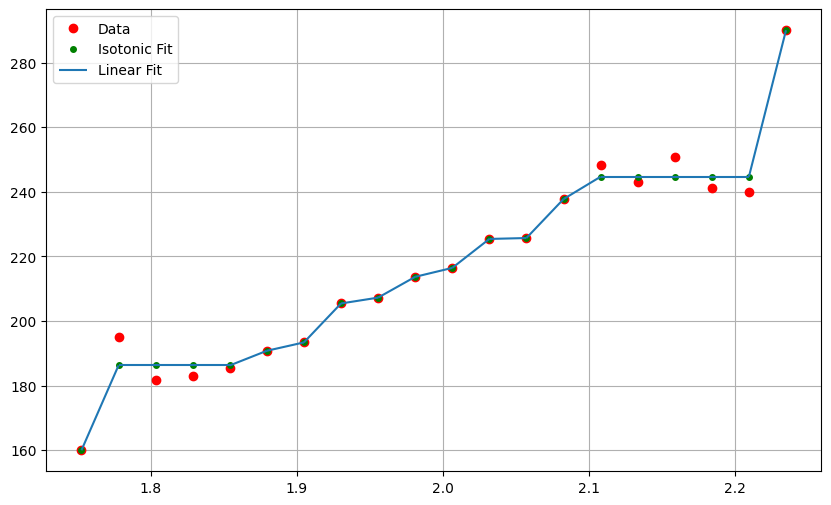

In [29]:
from matplotlib.collections import LineCollection

n = len(h_w_df['mean'])
lines = [[[X[i], y_ir[i]], [X[i+1], y_ir[i+1]]] for i in range(n-1)]
lc = LineCollection(lines)
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=12)
plt.plot(X, y_ir, 'g.', markersize=8)
plt.grid()
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'))
plt.show()

## 2. Polynomial Regression

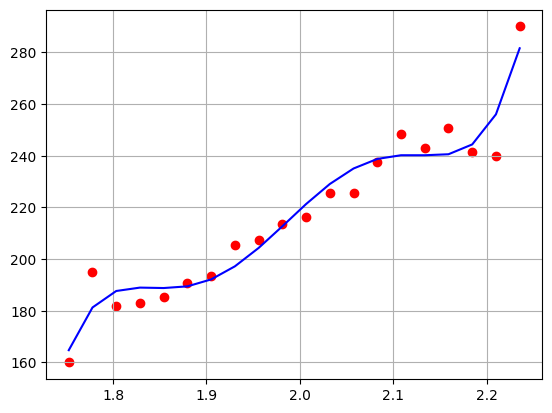

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = h_w_df['height'].values.reshape(-1, 1)
Y = h_w_df['mean'].values

poly = PolynomialFeatures(degree = 5)
poly_x = poly.fit_transform(X)

regressor = LinearRegression()
regressor.fit(poly_x, Y)

plt.scatter(X, Y, color='red')
plt.plot(X, regressor.predict(poly.fit_transform(X)), color = 'blue', )
plt.grid()
plt.show()



## 3